$**Table of contents**<a id='toc0_'></a>    
- [Résumé](#toc1_)    
  - [Problématique](#toc1_1_)    
  - [Caractéristiques propres](#toc1_2_)    
  - [Contrat de maintenance](#toc1_3_)    
  - [Améliorations](#toc1_4_)    
- [Introduction](#toc2_)    
  - [Imports et prérequis](#toc2_1_)    
  - [Fonctions spécifiques](#toc2_2_)    
  - [Chargement des données](#toc2_3_)    
- [Explicabilité marketing des clusters](#toc3_)    
  - [Nombre de clients par groupe](#toc3_1_)    
  - [CA par groupe](#toc3_2_)    
  - [Ce qui les sépare](#toc3_3_)    
  - [Catégories de produit](#toc3_4_)    
  - [Période de commande dans l'année](#toc3_5_)    
  - [Jour de la semaine favori](#toc3_6_)    
  - [Nb jours depuis dernière commande](#toc3_7_)    
  - [Type de paiement](#toc3_8_)    
  - [Notes et avis](#toc3_9_)    
- [Contrat de maintenance](#toc4_)    
  - [Stratégie](#toc4_1_)    
  - [Score ARI](#toc4_2_)    
  - [Pipeline](#toc4_3_)    
  - [Début du contrat](#toc4_4_)    
  - [t0 → d0, pp0, m0 et c0](#toc4_5_)    
  - [Stabilité des modèles](#toc4_6_)    
  - [Contrat à 6 semaines](#toc4_7_)    
- [Conclusions](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=2
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Résumé](#toc0_)

Liens utiles :
- [notebook de l'analyse exploratoire](./P4_EDA.ipynb)
- [notebook des approches de modélisation](./P4_models.ipynb)
- [notebook de mise à jour de la segmentation](./P4_simul.ipynb)
- [projet OC](https://openclassrooms.com/fr/paths/794/projects/1502/assignment)

Sources métier :
- [données](https://www.kaggle.com/olistbr/brazilian-ecommerce)
- [Segmentation RFM](https://www.definitions-marketing.com/definition/segmentation-rfm/)

## <a id='toc1_1_'></a>[Problématique](#toc0_)

Le modèle choisi a permis de regrouper la clientèle en **groupes homogènes**, tant en terme de nombre de clients que de CA généré.

Après **extraction de quelques caractéristiques** pour faciliter le travail à venir des équipes marketing, il s'agit d'établir un **contrat de maintenance basé sur la stabilité du modèle dans le temps**.

## <a id='toc1_2_'></a>[Caractéristiques propres](#toc0_)

S'ils partagent plusieurs habitudes, on constate que chacun de ces groupes dispose de **divers éléments qui lui sont propres, à un degré plus ou moins important**, et dans plusieurs domaines :
- catégorie de produit privilégiée
- période de commande favorite dans l'année
- jour de la semaine favori
- récence de la dernière commande
- type de paiement favori
- ou encore satisfaction exprimée

Certains éléments majeurs ont été extraits pour faciliter l'analyse marketing mais cet exercice doit être **effectué par les équipes métier** afin d'avoir l'analyse fine qui maximisera les actions à venir.

## <a id='toc1_3_'></a>[Contrat de maintenance](#toc0_)

La stabilité dans le temps d'un modèle de cluserisation s'effectue à l'aide d'une méthodologie reproductible.

Après détermination d'une date initiale idéale, le modèle est d'abord entraîné sur les données arrêtées à cette date puis testé tout au long de plusieurs semaines.  
Sa stabilité est ici déterminée par un score, l'**ARI (*Adjusted Rand Index***).  
Il y a toutefois une limite à cette métrique car le modèle est basé sur une notion aléatoire, bien que relativisée par l'usage d'une initialisation k-means++ : les scores vont donc pouvoir varier en fonction des entraînements de modèles.

Afin de faciliter la reproductibilité, les données passent par un **pipeline de pré-traitement**.  
Elles sont ensuite entraînées sur des échantillons temporels de la clientèle semaine après semaine.  

Lors du constat de la chute du score ARI, on détermine que le modèle est **fiable pendant 9 semaines avant de décliner**.  
Il s'agit de la limite haute pour la clusterisation d'une clientèle en pleine évolution.

Les tests sont alors effectués sur l'année toutes les 9 semaines : **ce pas est trop grand** et le modèle décline trop.
Un **réajustement du pas à 6 semaines** permet de constater une **meilleure stabilité tout au long de l'année**.

## <a id='toc1_4_'></a>[Améliorations](#toc0_)

De nombreuses améliorations sont possibles, **notamment de disposer de données plus récentes et fournies** pour :
- avoir davantage de recul
- bénéficier de comportement e-commerce plus fiables (post-COVID)
- utiliser une saisonnalité effective
- s'appuyer sur des données socio-démographiques restant hors RGPD

Une **analyse NLP des commentaires** est également proposée car les avis clients sont suffisamment nombreux et les notes variés pour utiliser des modèles LLM récents et affiner les actions marketing.

Il serait aussi important de pouvoir exporter les **tunnels d'achat** et faire une étude comportementale pour optimiser le **maillage interne** du site et augmenter les ventes additionnelles.

Enfin, cette étude ne constitue qu'un premier pas et les **résultats qu'elle permet d'ores-et-déjà d'exploiter** malgré un si faible recul **sont très encourageants** et incitent à emmener l'entreprise sur la voie de la data science.

# <a id='toc2_'></a>[Introduction](#toc0_)

## <a id='toc2_1_'></a>[Imports et prérequis](#toc0_)

Pré-requis de fonctionnement :

Packages utilisés :

```
Python 3.11.6
-----
dill                0.3.7
IPython             8.18.1
jupyter_client      8.6.0
jupyter_core        5.5.0
jupyterlab          4.0.9
matplotlib          3.8.2
notebook            7.0.6
numpy               1.26.2
pandas              2.1.3
plotly              5.18.0
seaborn             0.13.0
session_info        1.0.0
sklearn             1.3.2
```

In [1]:
# native
import logging
import dill as pickle # pickle extension for dataframes

# data science
import numpy as np
import pandas as pd

# models
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score as ari

# graphics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# PLOTLY render in GitHub & NBViewer
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# PANDAS prevent warnings
pd.options.mode.chained_assignment = None

# LOGGING configuration (see all outputs, even DEBUG or INFO)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

## <a id='toc2_2_'></a>[Fonctions spécifiques](#toc0_)

In [3]:
def make_cust_df(df):
    """
    Creates a customer-oriented dataframe, based on a global sales dataframe.

    Input:
    • df: global sales dataframe

    Output: modified dataframe
    • cust_df: customer oriented dataframe

    Requirements: pandas
    """

    useless_feats = ["customer_city", "customer_latitude",
        "customer_longitude", "customer_state", "customer_zip_code_prefix"]
    cust_feats = [c for c in df.filter(regex='^(customer_)|(categ_freq_)')\
        .columns.tolist() if c not in useless_feats]

    cust_df = df[cust_feats]

    cust_df = cust_df.groupby(["customer_unique_id"], as_index=False)\
        .agg(
            orders_count=("customer_orders", "first"),
            gross_sales=("customer_gross_sales", "first"),
            basket_avg=("customer_basket_avg", "first"),
            items_count=("customer_items_tot", "first"),
            items_avg=("customer_items_avg", "first"),
            categ_freq_fashion_beauty=("categ_freq_fashion_beauty", "first"),
            categ_freq_food_kitchen=("categ_freq_food_kitchen", "first"),
            categ_freq_house=("categ_freq_house", "first"),
            categ_freq_leisure=("categ_freq_leisure", "first"),
            categ_freq_pro_it=("categ_freq_pro_it", "first"),
            freight_avg=("customer_freight_avg", "first"),
            freight_by_gs=("customer_freight_by_gs", "first"),
            pay_type_cash=("customer_pay_cash", "first"),
            pay_type_credit_card=("customer_pay_credit_card", "first"),
            pay_type_debit_card=("customer_pay_debit_card", "first"),
            pay_installments=("customer_pay_installments", "first"),
            pay_sequential=("customer_pay_sequential", "first"),
            pay_type_voucher=("customer_pay_voucher", "first"),
            time_bw_orders_avg=("customer_orders_delay", "first"),
            time_delivery_avg=("customer_delivery_time_avg", "first"),
            time_since_last_order=("customer_days_last_order", "first"),
            time_fav_week=("customer_time_fav_week", "first"),
            time_fav_dow=("customer_time_fav_dow", "first"),
            time_fav_hour=("customer_time_fav_hour", "first"),
            reviews_count=("customer_reviews", "first"),
            reviews_mean_score=("customer_reviews_mean_score", "first"),
            seller_dist_avg=("customer_seller_dist_avg", "first"),
        )

    # clean & sort columns
    cust_df = cust_df.reindex(sorted(cust_df.columns), axis=1)

    return cust_df

def drop_id(df):
    """
    Returns a dataframe without "customer_unique_id" feature.

    Input:
    • df: dataframe with "customer_unique_id" feature

    Output: 
    • df_: dataframe without "customer_unique_id" feature

    Requirements: pandas
    """

    df_ = df.drop(columns=["customer_unique_id"])

    return df_

def str_to_ts(date_str):
    """
    Changes a "%Y-%m-%d %H:%M:%S" string date to a timestamp.
    """

    ts = pd.Timestamp(date_str).timestamp()

    return ts


## <a id='toc2_3_'></a>[Chargement des données](#toc0_)

In [4]:
with open('data_clustered.pkl', 'rb') as f: data = pickle.load(f)
with open('customers_clustered.pkl', 'rb') as f: customers = pickle.load(f)

# <a id='toc3_'></a>[Explicabilité marketing des clusters](#toc0_)

Voici quelques pistes pour aider l'équipe marketing à interpréter la manière dont sont formés les groupes.

## <a id='toc3_1_'></a>[Nombre de clients par groupe](#toc0_)

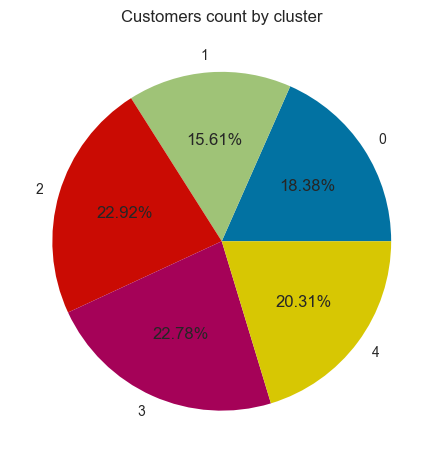

In [ ]:
_ = data.groupby(["customer_unique_id"], as_index=False)\
    .agg(clust=("customer_cluster", "first"))
c = _.groupby(["clust"], as_index=False).agg(count=("clust", "count"))
plt.pie(c["count"], labels=c["clust"], autopct='%.2f%%')
plt.title("Customers count by cluster")
plt.show()

Comme vu précédemment, les groupes ont une population équilibrée.

## <a id='toc3_2_'></a>[CA par groupe](#toc0_)

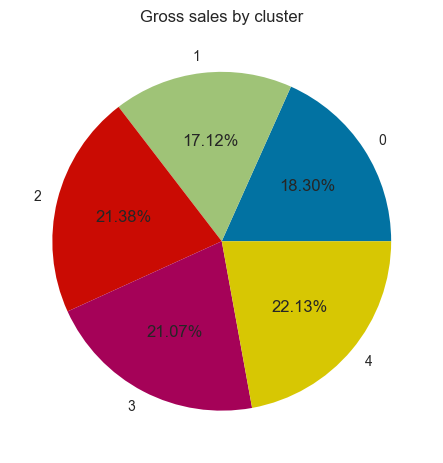

In [ ]:
_ = data.groupby(["order_id"], as_index=False)\
    .agg(
        cluster=("customer_cluster", "first"),
        gs=("order_gross_sales", "first"),
        )
gs_c = _.groupby(["cluster"], as_index=False).agg(gs=("gs", "sum"))

plt.pie(gs_c["gs"], labels=gs_c["cluster"], autopct='%.2f%%')
plt.title("Gross sales by cluster")
plt.show()

Le CA est lui aussi assez équitablement réparti entre les groupes.

## <a id='toc3_3_'></a>[Ce qui les sépare](#toc0_)

Une étude de la correlation entre les groupes et les autres variables permet d'identifier ce qui pourrait maintenant les différencier :

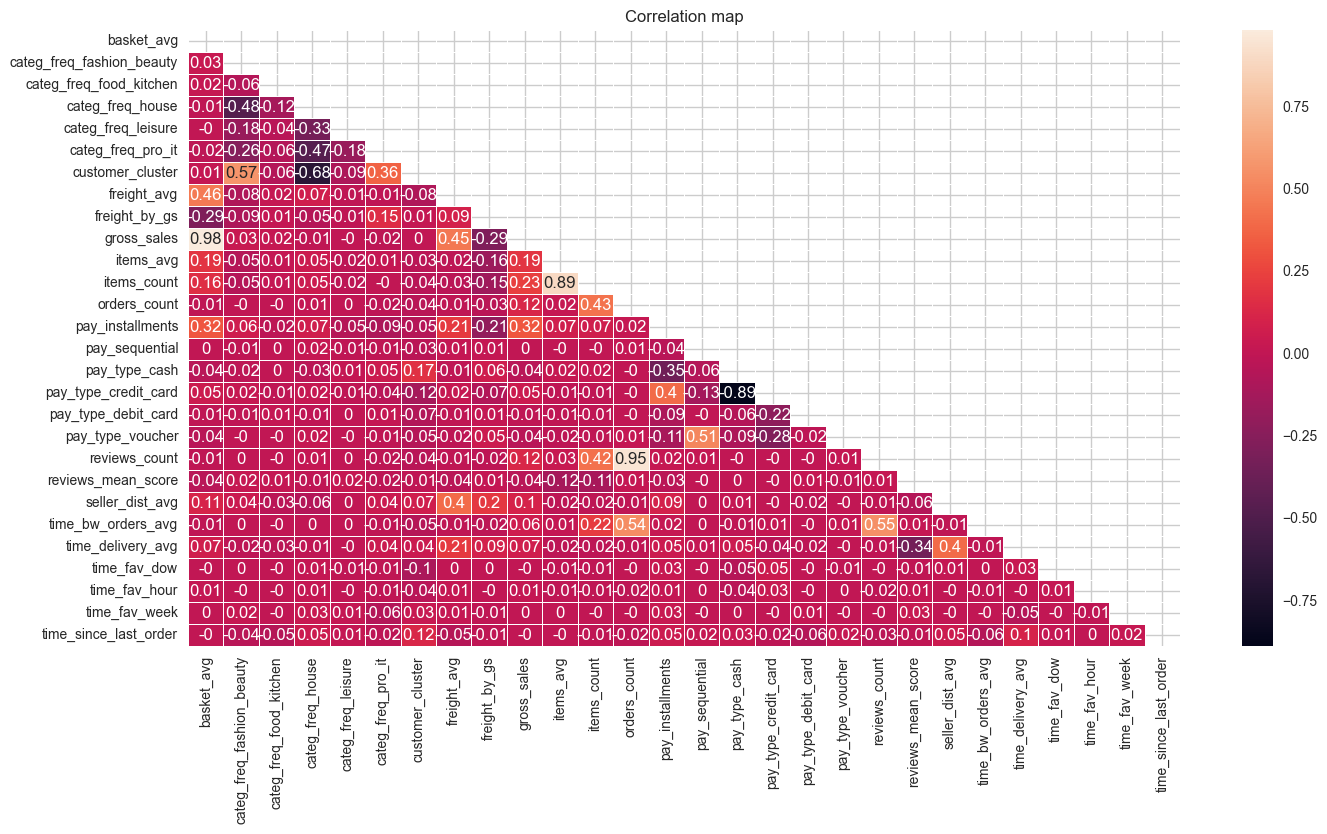

In [6]:
# matrix correlation
corr_mtx = customers.corr(numeric_only=True).round(2)

# mask for the upper half
mask = np.triu(np.ones_like(corr_mtx, dtype=bool))

f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(corr_mtx,
    annot = True,
    mask=mask,
    linewidths=.5,
)

plt.title("Correlation map")
plt.show()

On voit que les groupes sont a priori corrélés :
- aux catégories de produit achetés
- aux types de paiement
- à la récence des commandes

Ces points sont vérifiés ci-après, ainsi que d'autres variables qui constitueraient potentiellement des voies exploitables.

## <a id='toc3_4_'></a>[Catégories de produit](#toc0_)

In [7]:
fig = px.histogram(data_frame=data, x='product_category_name',
    color='customer_cluster', marginal='violin',
    category_orders={"customer_cluster": [0, 1, 2, 3, 4]})
fig.show()

Les préférences des groupes de clients pour une catégorie de produit sont marquées, cela pourra certainement aider au ciblage des actions marketing.

## <a id='toc3_5_'></a>[Période de commande dans l'année](#toc0_)

In [8]:
fig = px.histogram(data_frame=data, x='order_week',
    color='customer_cluster', marginal='violin',
    category_orders={"customer_cluster": [0, 1, 2, 3, 4]})
fig.show()

On voit de légères différences dans les préférences de commandes en fonction des groupes, avec notamment le groupe 0 qui commende plus tôt dans l'année et le groupe 2 plutôt tardif.

Malgré ces différences, le tronc commun de la saisonnalité est tout de même assez marqué dans chacun des groupes.

## <a id='toc3_6_'></a>[Jour de la semaine favori](#toc0_)

<Axes: xlabel='customer_cluster', ylabel='time_fav_dow'>

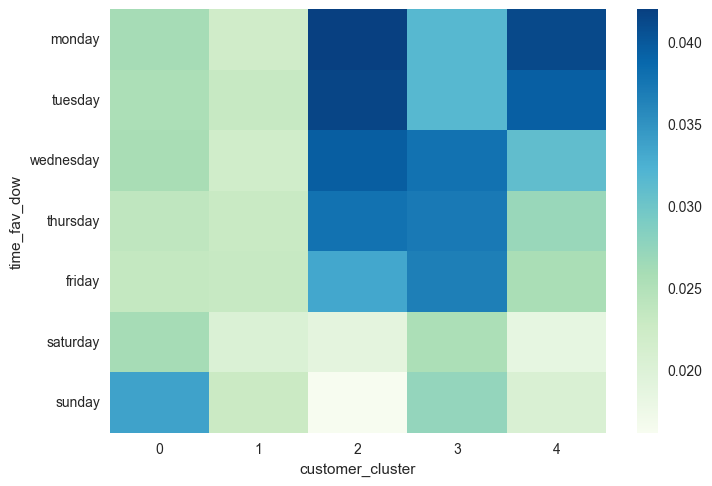

In [9]:
days_of_week = ["monday", "tuesday", "wednesday", "thursday",
    "friday", "saturday", "sunday"]
_ = pd.crosstab(customers['time_fav_dow'], customers['customer_cluster'],
    normalize=True)
sns.heatmap(_, cmap="GnBu", yticklabels=days_of_week)

Les différences sont davantage marquées pour le jour de la semaine, particulièrement le groupe 0 qui se démarque sur la fin de semaine.

## <a id='toc3_7_'></a>[Nb jours depuis dernière commande](#toc0_)

In [10]:
fig = px.histogram(data_frame=customers, x='time_since_last_order',
    color='customer_cluster', marginal='violin',
    category_orders={"customer_cluster": [0, 1, 2, 3, 4]})
fig.show()

Le groupe 0 représente les commandes plus récentes alors que le groupe 2 les commandes plus anciennes : un aspect marketing important.

## <a id='toc3_8_'></a>[Type de paiement](#toc0_)

De manière générale, le paiement par carte bancaire est très majoritaire (75.5%) et le liquide représente 20% :

In [11]:
_ = data.groupby(["order_id"], as_index=False)\
    .agg(
        cash=("paid_cash", "first"),
        credit_card=("paid_credit_card", "first"),
        debit_card=("paid_debit_card", "first"),
        voucher=("paid_voucher", "first"),
        )
_.drop(columns="order_id", inplace=True)
pmts = _.sum()

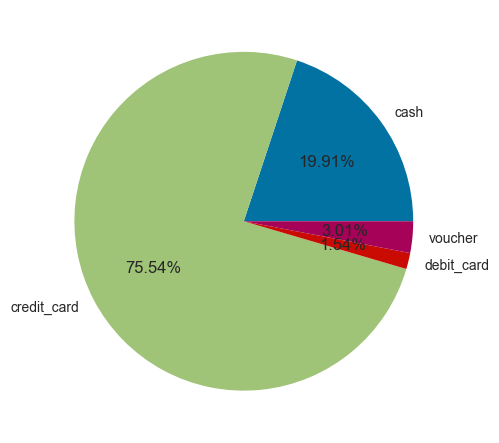

In [12]:
plt.pie(pmts, labels=pmts.index, autopct='%.2f%%')
plt.show()

Par groupe de clients :

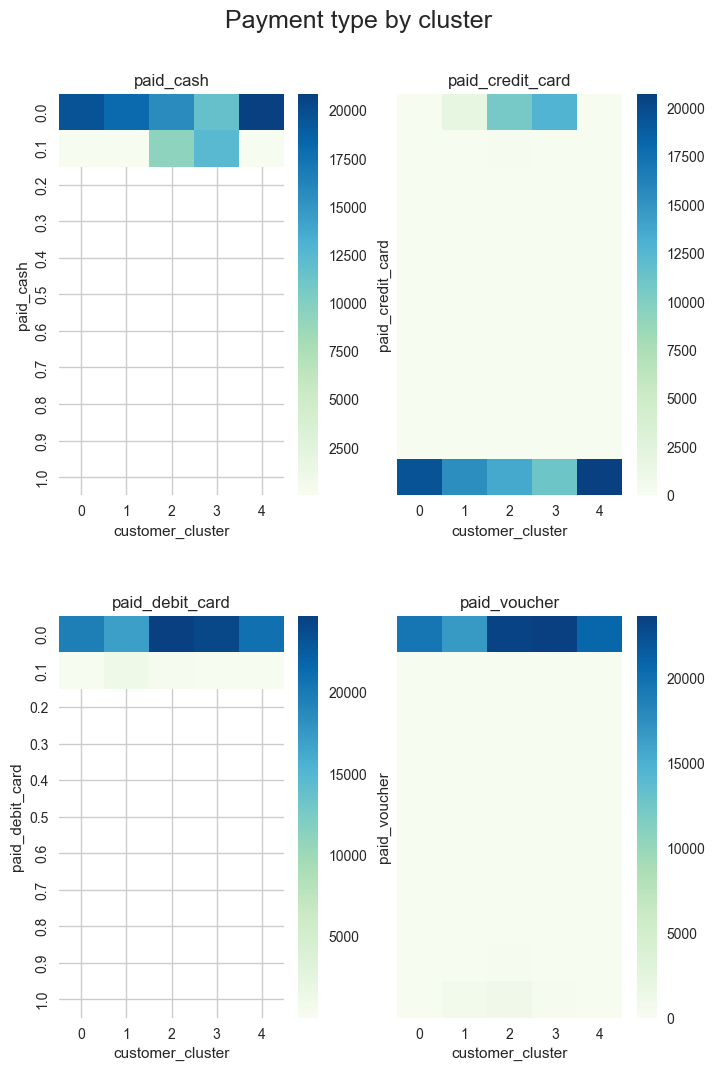

In [13]:
pmt_types = ['paid_cash', 'paid_credit_card', 'paid_debit_card', 'paid_voucher']

fig, axs = plt.subplots(nrows=2, ncols=2, sharey='row', figsize=(8, 12))
plt.subplots_adjust(hspace=0.3)
fig.suptitle("Payment type by cluster", fontsize=18, y=0.95)

# loop through tickers and axes
for pmt_type, ax in zip(pmt_types, axs.reshape(-1)):
    _ = pd.crosstab(data[pmt_type].round(1), data['customer_cluster'])
    sns.heatmap(_, cmap="GnBu", annot=False, ax=ax)
    ax.set_title(pmt_type)

plt.show()

Un zoom sur les types de paiement est nécessaire.

### Commandes payées en liquide

In [14]:
fig = px.histogram(data.loc[data['paid_cash'] > 0], x='paid_cash',
    color='customer_cluster', marginal='violin',
    category_orders={"customer_cluster": [0, 1, 2, 3, 4]})
fig.show()

Les groupes 2 et 3 sont les seuls concernés, à de rares exceptions près.

### Commandes payées en coupon

In [15]:
fig = px.histogram(data.loc[data['paid_voucher'] > 0], x='paid_voucher',
    color='customer_cluster', marginal='violin',
    category_orders={"customer_cluster": [0, 1, 2, 3, 4]})
fig.show()

Bien que cela ne représente pas de gros volumes de commandes, il y a une nette démarcation dans les groupes.

## <a id='toc3_9_'></a>[Notes et avis](#toc0_)

Cela peut constituer un aspect important des actions marketing, à combiner avec une étude des commentaires plus approfondie.

In [16]:
fig = px.histogram(data_frame=customers, x='reviews_mean_score',
    color='customer_cluster', facet_col='customer_cluster', marginal='violin',
    category_orders={"customer_cluster": [0, 1, 2, 3, 4]})
fig.update_xaxes(title="review score")
fig.show()

En effet, on constate par exemple que le groupe 1 rassemble les clients aux avis les plus mitigés.

# <a id='toc4_'></a>[Contrat de maintenance](#toc0_)

## <a id='toc4_1_'></a>[Stratégie](#toc0_)

Pour pouvoir simuler les besoins en maintenance, il est nécessaire de scinder les données par date.

S'il est important de choisir des périodes de maintenance idéales en amont des périodes de ventes importantes, il serait **dangereux de proposer tel quel une temporalité à l'année avec si peu de recul** et sur une activité à forte croissance, d'autant que la période observée est pré-COVID, avec des comportements e-commerce profondément bouleversés.

Un contrat de maintenance fiable passe par des **tests de stabilité du modèle dans le temps**.

Pour ce faire, les données nettoyées exportées précédemment sont utilisées dans le pipeline suivant :
- ajout de l'**année** de commande
- **sélection** par année et semaine
- création et export du jeu de données **client**
- **normalisation**
- réduction par **PCA**
- réduction par **t-SNE**

De là s'applique la stratégie suivante :
- 1er entraînement du modèle sur les données figées à une **date de départ** et application de la clusterisation (modèle m0 à t0)
- semaine suivante :
  - application de la clusterisation sur l'échantillon à t1 : m0 et m1 (modèle réentraîné avec les données de t1)
  - vérification de la cohérence avec **score ARI** entre m0 et m1
- si m0 n'est plus fiable, prendre m1 comme nouvelle référence
- passer à la semaine suivante t2 avec le même processus : m0 (ou m1 s'il est la nouvelle référence) comparé à m2
- continuer tout au long de l'année pour vérifier et planifier les besoins de nouvel entraînement du modèle

## <a id='toc4_2_'></a>[Score ARI](#toc0_)

Sources :
- [cours OpenClassrooms](https://openclassrooms.com/fr/courses/4379436-explorez-vos-donnees-avec-des-algorithmes-non-supervises/4379556-definissez-les-criteres-que-doit-satisfaire-votre-clustering#/id/r-4449882)
- [Wikipedia : indice de Rand](https://fr.wikipedia.org/wiki/Indice_de_Rand)
- [documentation Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation)

Il s'agit de l'**indice Rand ajusté** (*Adjusted Rand Index*), utilisé pour comparer la similarité entre deux partitions d'un ensemble.

L'indice de Rand **compare la proportion des paires d'éléments** qui sont conjointement groupées ou conjointement séparées (la consistance et le désaccord entre les deux partitions).

Cet indice peut être trompé par un nombre élevé de clusters, c'est pourquoi **on utilise plus souvent cet indice *ajusté*** (à savoir normalisé).  
L'ARI peut être défini comme suit, avec $E(RI)$ l'espérance de RI :

$$ARI = \frac{(RI - E(RI))}{(max(RI) - E(RI))}$$

On attend une valeur proche de 0 pour un échantillon aléatoire parmi les points et un maximum de 1 pour une similitude parfaite.

> **Limites** : on mesure un score de similité sur un modèle à base aléatoire, bien que **pondérée à la fois par l'usage de l'algorithme k-means++** à l'initialisation (qui utilise des centroïdes écartés).  
> Les scores peuvent donc varier dans une certaine proportion à la création de chaque nouveau modèle.

## <a id='toc4_3_'></a>[Pipeline](#toc0_)

Le processus de création du jeu de données client vu dans le [notebook de l'analyse exploratoire](./P4_EDA.ipynb#toc6_) est défini ici dans une fonction `make_cust_df`.

Une autre fonction personnalisée est `drop_id`, pour la suppression de la colonne non numérique `customer_unique_id`.

In [17]:
preprocessor = Pipeline([
        ("make_cust_df", FunctionTransformer(make_cust_df)),
        ("drop_id", FunctionTransformer(drop_id)),
        ('scaler', MinMaxScaler()),
        ('pca', PCA(n_components=0.95)),
        ('tsne', TSNE(n_components=2, perplexity=100)),
    ])

## <a id='toc4_4_'></a>[Début du contrat](#toc0_)

In [ ]:
# group by orders
df_orders_season = data.groupby(["order_id"], as_index=False)\
    .agg(w=("order_week", "first"), gs=("order_gross_sales", "first"))
# group by week to get gross sales sum
gs_by_week = df_orders_season.groupby(["w"], as_index=False)\
    .agg(gs=("gs", "sum"))

fig = make_subplots(rows=2, cols=1)
# orders by week
fig.add_trace(go.Histogram(x=df_orders_season["w"]), row=1, col=1)
# GS by week
fig.add_trace(go.Bar(x=gs_by_week["w"], y=gs_by_week["gs"]), row=2, col=1)
# display adjustments
fig.update_layout(title="Orders and GS per week ", showlegend=False,
    width=600, height=600, margin=dict(l=20, r=20, t=50, b=20))
fig.update_traces(textposition="outside", cliponaxis=False)
fig.show()

Des semaines de maintenance privilégiées par la saisonnalité pourraient être les 15, 28 et 46 car elles précèdent des pics d'activité.  
Néanmoins, dans le cas de la semaine 46, si elle précède un pic, elle suit également plusieurs semaines de creux d'activité qui pourraient biaiser le modèle de départ.

In [77]:
# group by orders
df_orders_season = data.groupby(["order_id"], as_index=False)\
    .agg(w=("order_date", "first"), gs=("order_gross_sales", "first"))
# group by week to get gross sales sum
gs_by_week = df_orders_season.groupby(["w"], as_index=False)\
    .agg(gs=("gs", "sum"))

fig = make_subplots()
# orders by week
fig.add_trace(go.Histogram(x=df_orders_season["w"]))
# GS by week
# display adjustments
fig.update_layout(title="Orders per week ", showlegend=False,
    width=600, height=400, margin=dict(l=20, r=20, t=50, b=20))
fig.update_traces(textposition="outside", cliponaxis=False)
fig.show()

Autre point : les données datent de septembre 2016 et il est nécessaire d'avoir un volume minimum de données pour le départ. En effet, les premières commandes étant timides, il est important de commencer l'étude à partir d'une activité suffisante.

La **semaine 28 de l'année 2017 sera donc sélectionnée** car elle permet l'étude d'une année complète avec suffisamment de données de départ et précède une période de forte volumétrie sans pour autant succéder à une période trop basse.

## <a id='toc4_5_'></a>[t0 → d0, pp0, m0 et c0](#toc0_)

Le premier jeu de données **d0** correspond aux données de vente depuis le début d'activité jusqu'à la date de départ, fixée ci-avant.  
Sachant que la semaine 28 de l'année 2017 commence le 10/07 :

In [19]:
t0 = str_to_ts("2017-07-10 00:00:00")

In [20]:
d0 = data.loc[data["order_purchase_timestamp"] < t0]

In [21]:
print(f"data_0 starts at {d0['order_date'].min()}")
print(f"and ends at {d0['order_date'].max()}")
print(f"with shape {d0.shape}")

data_0 starts at 2016-10-03 09:44:50
and ends at 2017-07-09 23:48:00
with shape (16701, 71)


Les données pré-traitées sont ainsi nommées **pp0** :

In [22]:
pp0 = preprocessor.fit_transform(d0)

c:\Users\jlemaire\projets\OC_projects\env\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\jlemaire\projets\OC_projects\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Le modèle de départ **m0** correspond à un entraînement sur ce premier jeu de données :

In [23]:
m0 = KMeans(n_clusters=5, n_init='auto')
m0.fit(pp0)

KMeans(n_clusters=5, n_init='auto')

Et le premier cluster **c0** correspond aux données client sur la même période, avec les clusters définis par le modèle m0 :

In [24]:
c0 = m0.labels_

## <a id='toc4_6_'></a>[Stabilité des modèles](#toc0_)

Chaque semaine $k$, un comparatif est effectué entre le clustering $c_k$ du modèle $m_k$ réentraîné sur les données $d_k$ et le modèle en cours d'usage $m_{k-i}$.

Il est donc d'abord nécessaire pour chaque semaine de créer les données, les différents modèles et clusters puis de les comparer.

Incrémentation d'une semaine pour chaque jeu de données :

In [25]:
next_week = str_to_ts("2017-07-17 00:00:00") - t0
print(f"Next week is in {next_week} seconds")

Next week is in 604800.0 seconds


Création des modèles et analyse de la stabilité, sur une **période maximale de 12 semaines** (qui serait trop longue pour cet usage, sur une clientèle en pleine expansion) :

In [26]:
# for each model, save timestamp, data, preprocessed data, model and clusters
# t0 data already in place to avoid useless computation
start_clust = [{"ts": t0, "data": d0, "pp": pp0, "model": m0, "clusters": c0}]

# for predictions and scores, already filled with t0 information
# including dummy ARI for c0 (= 1.0)
preds_m0 = [c0] ; scores = [round(ari(c0, c0), 2)]

for i in range(1,13):
    ts = t0 + (next_week * i)
    d = data.loc[data["order_purchase_timestamp"] < ts]
    pp = preprocessor.fit_transform(d)
    m = KMeans(n_clusters=5, n_init='auto').fit(pp)
    c = m.labels_

    # use m0 to predict t(i) value
    pred_m0 = m0.predict(pp)
    preds_m0.append(pred_m0)

    # ARI score comparing clusters c0 and c(i)
    score = round(ari(pred_m0, c), 2)
    scores.append(score)

    # save models
    _ = {"ts": ts, "data": d, "pp": pp, "model": m, "clusters": c}
    start_clust.append(_)

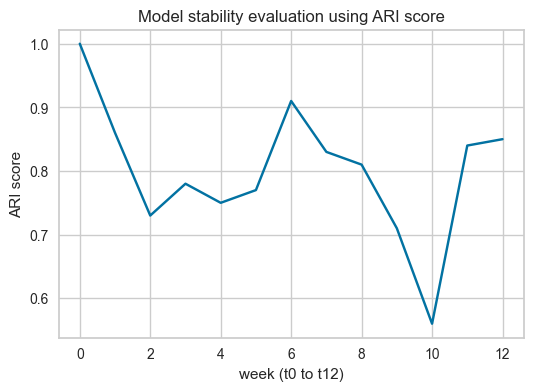

In [27]:
plt.figure(figsize=(6,4))
plt.title("Model stability evaluation using ARI score")
plt.xlabel("week (t0 to t12)")
plt.ylabel("ARI score")
plt.plot(scores)

D'après la simulation précédente, la stabilité du modèle a un déclin vers 9 semaines : une maintenance toutes les 9 semaines (2 mois environ) est envisageable.

### Tests de stabilité : pas à 9 semaines

In [46]:
step = 9 # weeks

Simulation d'une mise à jour au départ de t0 :

In [96]:
# same process, starting with t0 (week 28) and t1 (week 37)
year_clust = start_clust[::step]
year_preds = [c0, year_clust[1]["clusters"]]
year_scores = [scores[0], scores[step]]

for i in range(2, 7):
    ts = t0 + (next_week * i * step)
    d = data.loc[data["order_purchase_timestamp"] < ts]
    pp = preprocessor.fit_transform(d)
    m = KMeans(n_clusters=5, n_init='auto').fit(pp)
    c = m.labels_

    # use the previous model m(i-1) to predict t(i) clusters
    prev_m_pred = year_clust[-1]["model"].predict(pp)
    year_preds.append(prev_m_pred)

    # ARI score comparing clusters c(i-1) and c(i)
    score = round(ari(prev_m_pred, c), 2)
    year_scores.append(score)

    # save model
    _ = {"ts": ts, "data": d, "pp": pp, "model": m, "clusters": c}
    year_clust.append(_)

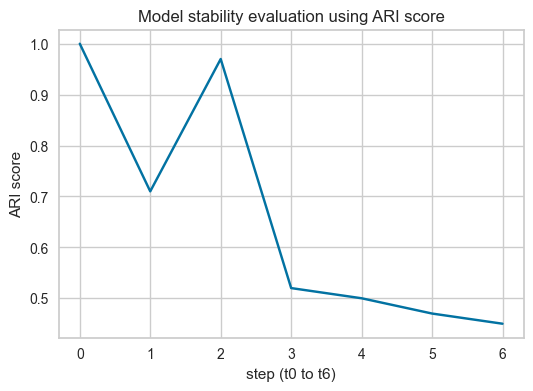

In [98]:
plt.figure(figsize=(6,4))
plt.title("Model stability evaluation using ARI score")
plt.xlabel("step (t0 to t6)")
plt.ylabel("ARI score")
plt.plot(year_scores)

Ce test semble trop ambitieux puisque le modèle poursuit un certain déclin.

### Test de stabilité : pas à 6 semaines

In [108]:
step = 6 # weeks

Simulation d'une mise à jour au départ de t0 :

In [109]:
# same process, starting with t0 (week 28), t1 (week 34) and t2 (week 40)
year_clust_6 = start_clust[::step]
year_preds_6 = [c0, year_clust_6[1]["clusters"], year_clust_6[2]["clusters"]]

# computing third score, between t1 and t2
pp = year_clust_6[2]["pp"]
c = year_clust_6[2]["clusters"]
prev_m_pred = year_clust_6[1]["model"].predict(pp)
score = round(ari(prev_m_pred, c), 2)
# then creating initial scores list before loop
year_scores_6 = [
    scores[0],
    scores[step],
    score,
    ]

for i in range(3, 10):
    ts = t0 + (next_week * i * step)
    d = data.loc[data["order_purchase_timestamp"] < ts]
    pp = preprocessor.fit_transform(d)
    m = KMeans(n_clusters=5, n_init='auto').fit(pp)
    c = m.labels_

    # use the previous model m(i-1) to predict t(i) clusters
    prev_m_pred = year_clust_6[-1]["model"].predict(pp)
    year_preds_6.append(prev_m_pred)

    # ARI score comparing clusters c(i-1) and c(i)
    score = round(ari(prev_m_pred, c), 2)
    year_scores_6.append(score)

    # save model
    _ = {"ts": ts, "data": d, "pp": pp, "model": m, "clusters": c}
    year_clust_6.append(_)

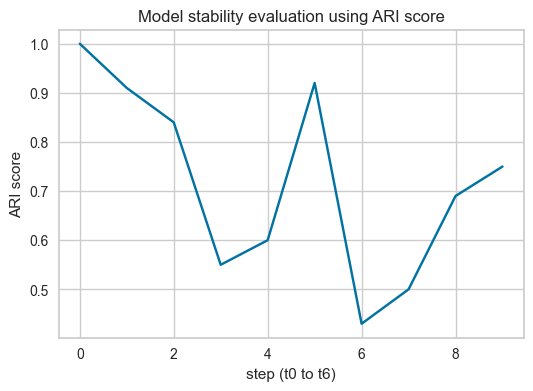

In [112]:
plt.figure(figsize=(6,4))
plt.title("Model stability evaluation using ARI score")
plt.xlabel("step (t0 to t6)")
plt.ylabel("ARI score")
plt.plot(year_scores_6)

## <a id='toc4_7_'></a>[Contrat à 6 semaines](#toc0_)

Suite aux différents tests, un **contrat de maintenance avec un réentraînement du modèle toutes les 6 semaines** paraît de bon aloi.

Néanmoins, puisque l'entreprise est en **forte croissance** avec une clientèle de plus en plus nombreuse, il est conseillé de **ne rien exclure** afin de maximiser les actions marketing.

# <a id='toc5_'></a>[Conclusions](#toc0_)

Le modèle de clustering a permis de distinguer **plusieurs groupes homogènes avec des tendances distinctes** et permettant des **actions marketing efficaces**.

Cependant, ce modèle doit être **révisé régulièrement** afin de correspondre à une clientèle en évolution perpétuelle, notamment **avant de fortes périodes d'affluences** ou des **évènements** sur lesquels le service marketing souhaiterait positionner l'entreprise (Noël, carnaval, fête nationale...).

La stratégie définie peut toutefois être **fortement améliorée** sur plusieurs aspects :
- la **clientèle est nombreuse mais volatile à 94% alors que les avis clients sont plutôt positifs** : quelques **actions de fidélisation** permettraient une très forte hausse du chiffre d'affaires avec un bien meilleur ROI (coûts d'acquisitions le plus souvent bien supérieurs aux coûts de fidélisation)
- les données dont nous disposons correspondent au début de l'entreprise et le **recul n'est pas suffisant** pour un clustering totalement efficace, en suivant par exemple une **saisonnalité** plus appuyée
- les comportements de consommation sur Internet ont subi une très **forte mutation depuis la crise COVID** : il est indispensable de disposer de **données récentes** pour correspondre à une clientèle actuelle
- **davantage de données socio-démographiques** (e.g. âge, situation familiale) pourraient beaucoup aider à l'analyse tout en restant hors du cadre d'application du RGPD
- une **analyse NLP des avis clients** est à effectuer : cette approche est de plus en plus fréquente et abordable depuis l'essor des LLM et permet une grande finesse pour une clusterisation et fidélisation client
- l'export des **tunnels d'achat** et l'étude comportementale qui en découlerait pourraient optimiser le **maillage interne** du site et augmenter considérablement les ventes additionnelles

Il y a déjà des **résultats utilisables** alors qu'on ne dispose ni de récurrence ni de réelle saisonnalité : c'est un **très bon premier pas** pour des améliorations, très encourageant pour l'entreprise.